### **Installing Required Libraries for Financial Data Analysis and Notebook Conversion to PDF**

In [ ]:
!pip install yfinance
!pip install pandas_datareader
!pip install statsmodels
!pip install arch
!pip install yfinance pandas_market_calendars matplotlib
!pip install yfinance numpy pandas matplotlib
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc


### **Importing Libraries for Financial Data Analysis, Statistical Modeling, and Visualization**

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.integrate import quad
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
from numpy.random import normal
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.cm as cm
from scipy.stats import norm, probplot, poisson
from datetime import datetime, timedelta
from scipy import stats
from matplotlib.dates import DateFormatter
from scipy import optimize

import os

### **Simulating Geometric Brownian Motion (GBM) for Stock Price Modeling**

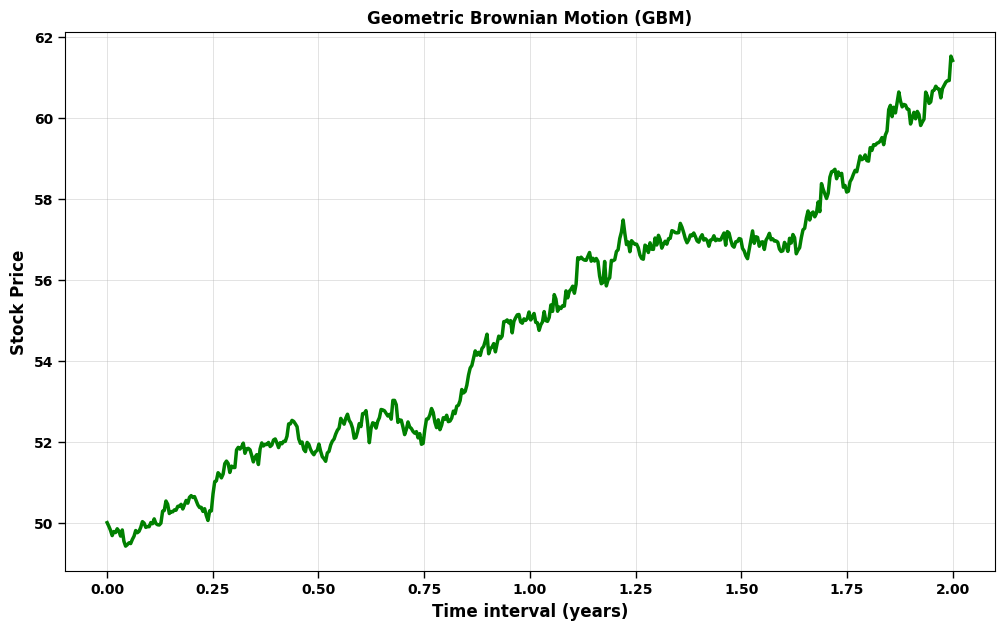

In [3]:
# Parameters
drift_rate = 0.12
volatility = 0.05
initial_price = 50
trading_days_per_year = 252
time_years = 2
num_simulations = 10
num_steps = time_years * trading_days_per_year
time_step = time_years / num_steps

np.random.seed(13)

# Simulating Geometric Brownian Motion
time_intervals = np.linspace(0, time_years, num_steps)
prices = np.zeros((num_steps, num_simulations))
prices[0] = initial_price

for step in range(1, num_steps):
    Z = np.random.standard_normal(num_simulations)
    prices[step] = prices[step - 1] * np.exp((drift_rate - 0.5 * volatility**2) * time_step + volatility * np.sqrt(time_step) * Z)

plt.figure(figsize=(12, 7))

plt.plot(time_intervals, prices[:, 0], color='green', linestyle='-', linewidth=2.5)

plt.title("Geometric Brownian Motion (GBM)", fontsize=12, fontweight='bold')
plt.xlabel("Time interval (years)", fontsize=12, fontweight='bold')
plt.ylabel("Stock Price", fontsize=12, fontweight='bold')
plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=10, labelcolor='black', width=1, length=5)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()


### **Simulating Multiple Paths of Geometric Brownian Motion (GBM) for Stock Price Forecasting**

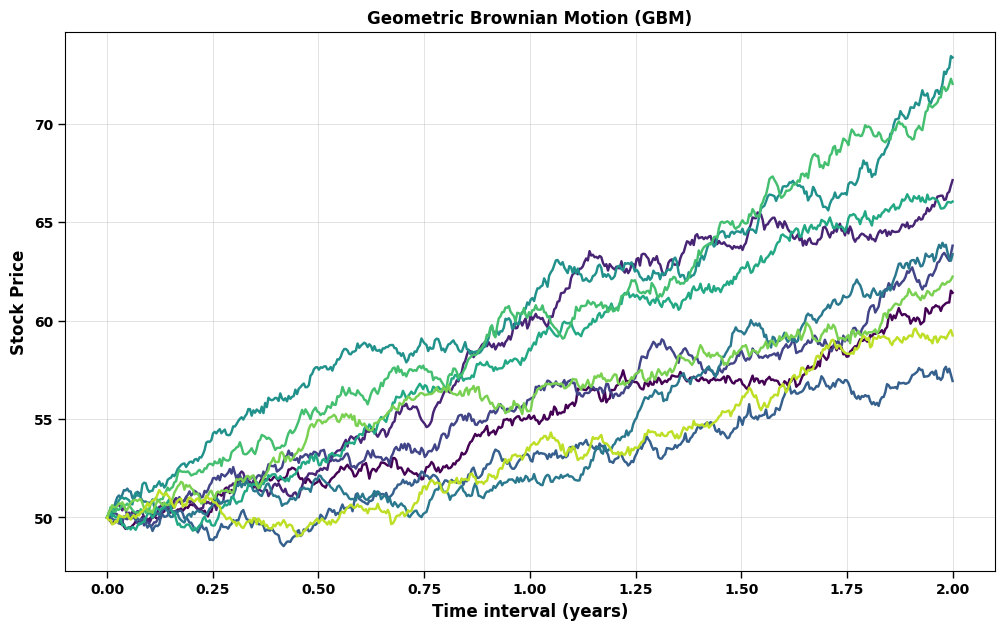

In [4]:
# Parameters
drift_rate = 0.12
volatility = 0.05
initial_price = 50
trading_days_per_year = 252
time_years = 2
num_simulations = 10
num_steps = time_years * trading_days_per_year
time_step = time_years / num_steps

np.random.seed(13)

# Simulating Geometric Brownian Motion
time_intervals = np.linspace(0, time_years, num_steps)
prices = np.zeros((num_steps, num_simulations))
prices[0] = initial_price

for step in range(1, num_steps):
    Z = np.random.standard_normal(num_simulations)
    prices[step] = prices[step - 1] * np.exp((drift_rate - 0.5 * volatility**2) * time_step + volatility * np.sqrt(time_step) * Z)

plt.figure(figsize=(12, 7))

cmap = plt.colormaps['viridis']
colors = [cmap(i / num_simulations) for i in range(num_simulations)]

for simulation in range(num_simulations):
    plt.plot(time_intervals, prices[:, simulation], color=colors[simulation], linestyle='-', linewidth=1.75, alpha=1.0)

plt.title("Geometric Brownian Motion (GBM)", fontsize=12, fontweight='bold')
plt.xlabel("Time interval (years)", fontsize=12, fontweight='bold')
plt.ylabel("Stock Price", fontsize=12, fontweight='bold')
plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=10, labelcolor='black', width=1, length=5)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()


### **Simulating Stock Price Paths and Analyzing Final Price Distribution with Geometric Brownian Motion (GBM): Histogram and Q-Q Plot Comparison**

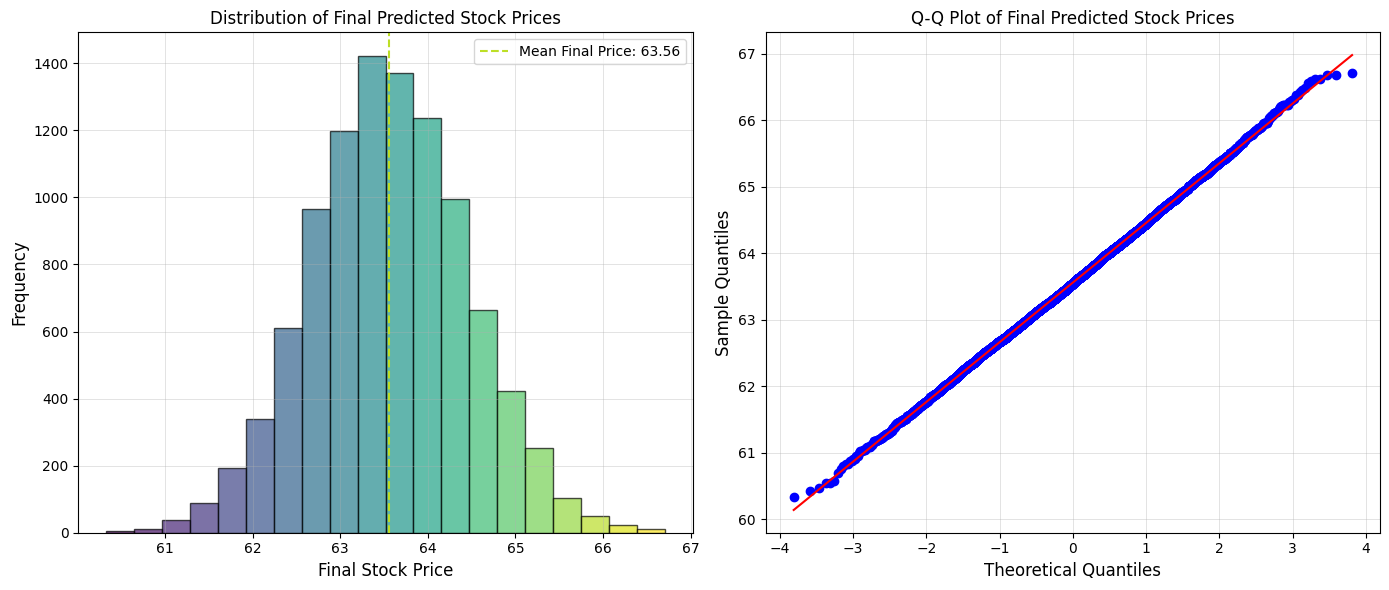

In [5]:
np.random.seed(13)

# Parameters
initial_price = 50
trading_days_per_year = 252
time_years = 2
num_simulations = 10000
num_steps = time_years * trading_days_per_year
time_step = time_years / num_steps
drift_rate = 0.12
volatility = 0.01

# Simulate the GBM with the specified parameters
simulations = np.zeros((num_simulations, num_steps + 1))
simulations[:, 0] = initial_price

for t in range(1, num_steps + 1):
    Z = np.random.standard_normal(num_simulations)
    simulations[:, t] = simulations[:, t-1] * np.exp((drift_rate - 0.5 * volatility**2) * time_step + volatility * np.sqrt(time_step) * Z)

final_prices = simulations[:, -1]

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

n, bins, patches = axs[0].hist(final_prices, bins=20, edgecolor='black', alpha=0.7)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
colormap = plt.cm.viridis
norm = plt.Normalize(bin_centers.min(), bin_centers.max())

for c, p in zip(bin_centers, patches):
    plt.setp(p, 'facecolor', colormap(norm(c)))

axs[0].axvline(final_prices.mean(), color=plt.cm.viridis(0.9), linestyle='--', label=f'Mean Final Price: {final_prices.mean():.2f}')
axs[0].set_title('Distribution of Final Predicted Stock Prices', fontsize=12)
axs[0].set_xlabel('Final Stock Price', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].legend()
axs[0].grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.5)

stats.probplot(final_prices, dist="norm", plot=axs[1])
axs[1].set_title('Q-Q Plot of Final Predicted Stock Prices', fontsize=12)
axs[1].set_xlabel('Theoretical Quantiles', fontsize=12)
axs[1].set_ylabel('Sample Quantiles', fontsize=12)
axs[1].grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()


### **Comparing Geometric Brownian Motion (GBM) Simulations with Varying Volatility and Drift Rates**

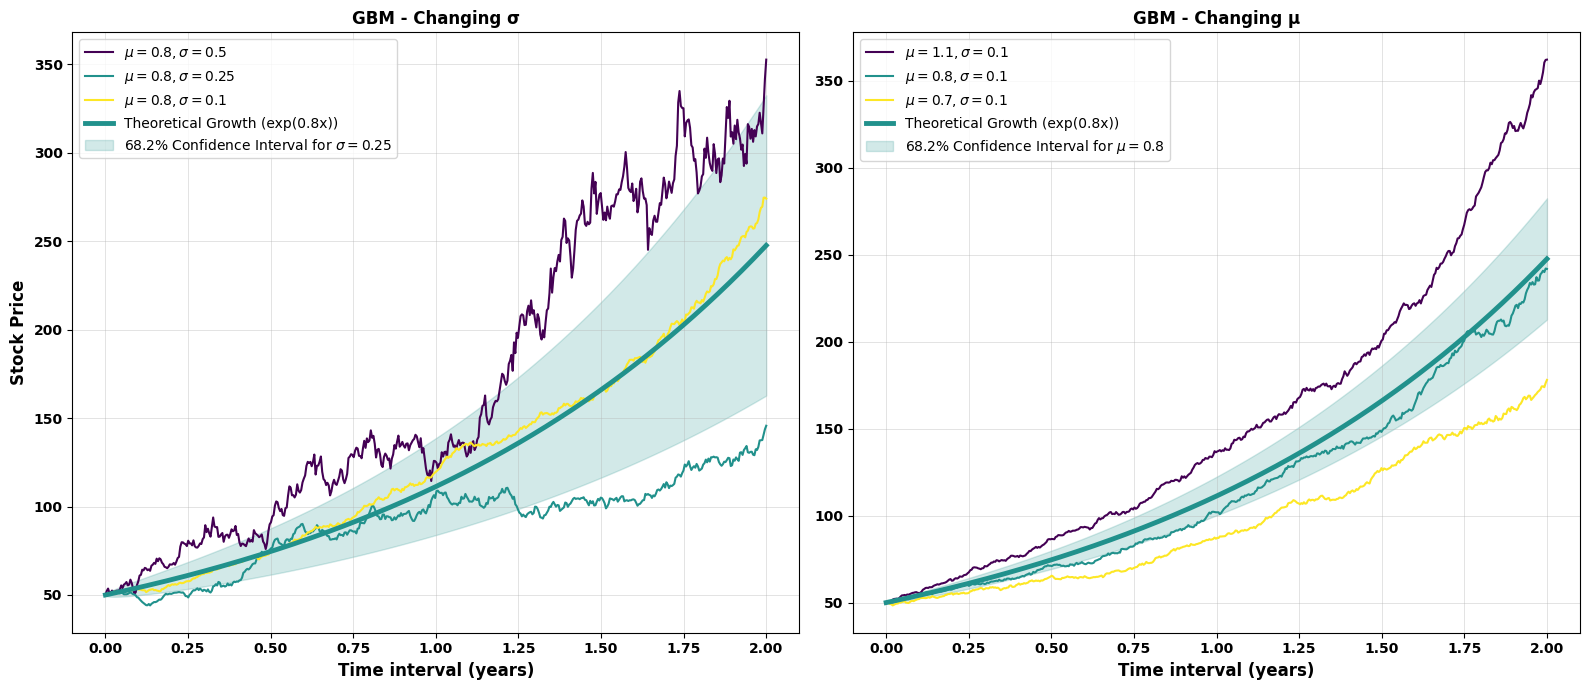

In [7]:
# Parameters
drift_rate = 0.8
volatility_values = [0.5, 0.25, 0.1]
drift_values = [1.1, 0.8, 0.7]
constant_volatility = 0.1
initial_price = 50
trading_days_per_year = 252
time_years = 2
num_steps = time_years * trading_days_per_year
time_step = time_years / num_steps

np.random.seed(10)

time_intervals = np.linspace(0, time_years, num_steps)
simulations_volatility = {}

for sigma in volatility_values:
    prices = np.zeros((num_steps,))
    prices[0] = initial_price
    for step in range(1, num_steps):
        Z = np.random.standard_normal()
        prices[step] = prices[step - 1] * np.exp((drift_rate - 0.5 * sigma**2) * time_step + sigma * np.sqrt(time_step) * Z)
    simulations_volatility[sigma] = prices

# Simulating Geometric Brownian Motion for different drift rates
simulations_drift = {}

for mu_val in drift_values:
    prices = np.zeros((num_steps,))
    prices[0] = initial_price
    for step in range(1, num_steps):
        Z = np.random.standard_normal()
        prices[step] = prices[step - 1] * np.exp((mu_val - 0.5 * constant_volatility**2) * time_step + constant_volatility * np.sqrt(time_step) * Z)
    simulations_drift[mu_val] = prices

plt.figure(figsize=(16, 7))

cmap = plt.colormaps['viridis']
colors = cmap(np.linspace(0, 1, len(volatility_values)))
for i, sigma in enumerate(volatility_values):
    plt.subplot(1, 2, 1)
    plt.plot(time_intervals, simulations_volatility[sigma], color=colors[i], label=f'$\\mu={drift_rate}, \\sigma={sigma}$')

exp_line_color = colors[1]
plt.plot(time_intervals, initial_price * np.exp(drift_rate * time_intervals), color=exp_line_color, linestyle='-', linewidth=3.5, label='Theoretical Growth (exp(0.8x))')
mean_prices = initial_price * np.exp(drift_rate * time_intervals)
std_prices = initial_price * np.exp((drift_rate - 0.5 * 0.25**2) * time_intervals) * np.sqrt(np.exp(0.25**2 * time_intervals) - 1)
plt.fill_between(time_intervals, mean_prices - std_prices, mean_prices + std_prices, color=exp_line_color, alpha=0.2, label='68.2% Confidence Interval for $\\sigma=0.25$')
plt.title("GBM - Changing σ", fontsize=12, fontweight='bold')
plt.xlabel("Time interval (years)", fontsize=12, fontweight='bold')
plt.ylabel("Stock Price", fontsize=12, fontweight='bold')
plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=10)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

colors = cmap(np.linspace(0, 1, len(drift_values)))
for i, mu_val in enumerate(drift_values):
    plt.subplot(1, 2, 2)
    plt.plot(time_intervals, simulations_drift[mu_val], color=colors[i], label=f'$\\mu={mu_val}, \\sigma={constant_volatility}$')

exp_line_color = colors[1]
plt.plot(time_intervals, initial_price * np.exp(drift_rate * time_intervals), color=exp_line_color, linestyle='-', linewidth=3.5, label=f'Theoretical Growth (exp({drift_rate}x))')
mean_prices = initial_price * np.exp(drift_rate * time_intervals)
std_prices = initial_price * np.exp((drift_rate - 0.5 * constant_volatility**2) * time_intervals) * np.sqrt(np.exp(constant_volatility**2 * time_intervals) - 1)
plt.fill_between(time_intervals, mean_prices - std_prices, mean_prices + std_prices, color=exp_line_color, alpha=0.2, label=f'68.2% Confidence Interval for $\\mu={drift_rate}$')
plt.title("GBM - Changing μ", fontsize=12, fontweight='bold')
plt.xlabel("Time interval (years)", fontsize=12, fontweight='bold')
plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=10)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


### **Analyzing the Impact of Drift and Volatility on Final Stock Prices Using Geometric Brownian Motion (GBM)**

In [8]:
np.random.seed(13)

# Parameters
initial_price = 50
trading_days_per_year = 252
time_years = 2
num_simulations = 10000
num_steps = time_years * trading_days_per_year
time_step = time_years / num_steps

# Function to simulate GBM and calculate mean and standard deviation
def simulate_gbm(drift_rate, volatility):
    simulations = np.zeros((num_simulations, num_steps + 1))
    simulations[:, 0] = initial_price
    for t in range(1, num_steps + 1):
        Z = np.random.standard_normal(num_simulations)
        simulations[:, t] = simulations[:, t-1] * np.exp((drift_rate - 0.5 * volatility**2) * time_step + volatility * np.sqrt(time_step) * Z)
    final_prices = simulations[:, -1]
    return round(final_prices.mean(), 2), round(final_prices.std(), 2)

drift_rates = [0.001, 0.005, 0.010, 0.050, 0.100, 0.500, 0.700, 0.800, 0.850, 0.900]
drift_data = {'Drift Rate (μ)': drift_rates}
drift_means = []
drift_stds = []

for drift_rate in drift_rates:
    mean, std = simulate_gbm(drift_rate, 0.01)
    drift_means.append(mean)
    drift_stds.append(std)

drift_data['Sample Mean'] = drift_means
drift_data['Sample Deviation'] = drift_stds
df_drift = pd.DataFrame(drift_data)

volatility_rates = [0.001, 0.005, 0.010, 0.050, 0.100, 0.500, 0.700, 0.800, 0.850, 0.900]
volatility_data = {'Volatility Rate (σ)': volatility_rates}
volatility_means = []
volatility_stds = []

for volatility in volatility_rates:
    mean, std = simulate_gbm(0.12, volatility)
    volatility_means.append(mean)
    volatility_stds.append(std)

volatility_data['Sample Mean'] = volatility_means
volatility_data['Sample Deviation'] = volatility_stds
df_volatility = pd.DataFrame(volatility_data)

print("Drift Rate Table:")
print(df_drift.T.to_string(header=False))

print("\nVolatility Rate Table:")
print(df_volatility.T.to_string(header=False))


Drift Rate Table:
Drift Rate (μ)     0.001   0.005   0.01   0.05   0.10    0.50    0.70    0.80    0.85    0.90
Sample Mean       50.100  50.510  51.00  55.26  61.06  135.92  202.74  247.60  273.72  302.49
Sample Deviation   0.710   0.720   0.72   0.79   0.86    1.91    2.84    3.49    3.91    4.31

Volatility Rate Table:
Volatility Rate (σ)   0.001   0.005   0.01   0.05   0.10   0.50   0.70    0.80    0.85    0.90
Sample Mean          63.560  63.550  63.56  63.56  63.56  64.21  63.55   63.46   62.17   64.24
Sample Deviation      0.090   0.440   0.90   4.48   9.05  53.05  95.43  105.90  108.52  119.69
